In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

## Bands Information

https://gisgeography.com/sentinel-2-bands-combinations/

In [ ]:
# r'../raw_data/dongdung/dongdung/{}'
# r'../raw_data/sugarcane_korat/sugarcane_korat/{}'
# filename format - id_{field_id}_{data_type}_{date}.tif

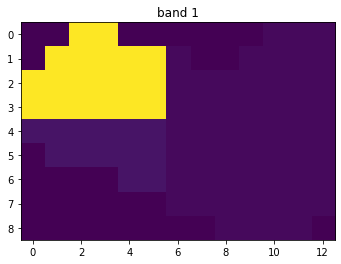

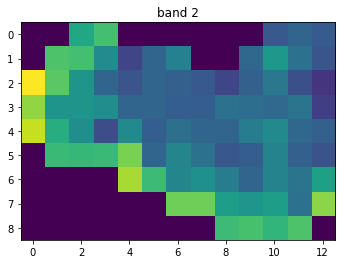

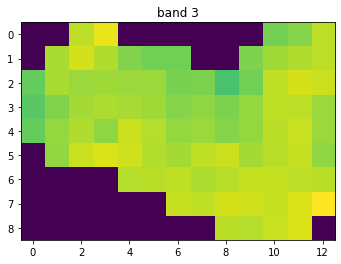

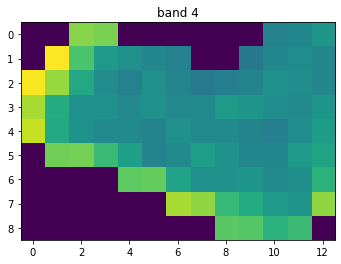

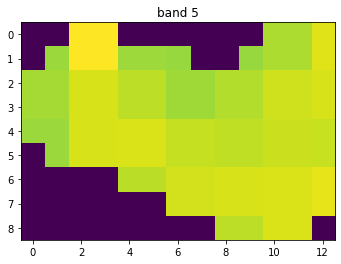

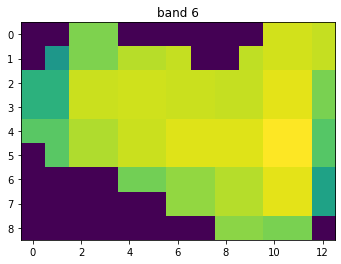

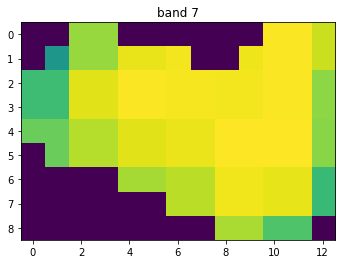

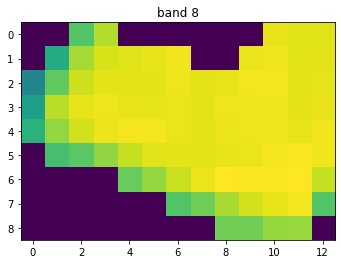

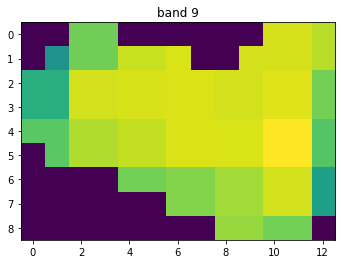

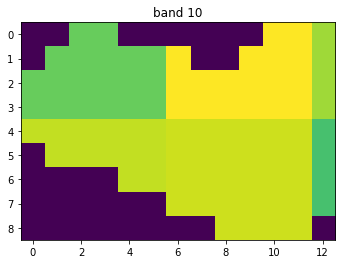

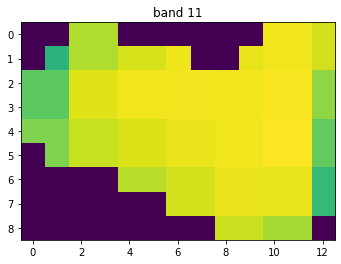

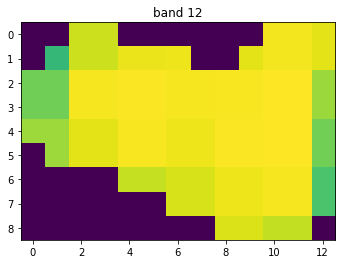

In [9]:
fp = r'../raw_data/dongdung/dongdung/id_60a091c6f85c5e001b871494_all_bands_2021-01-20.tif'
img = rasterio.open(fp)
for i in range(1,13):
    plt.title(f"band {i}")
    show(img.read(i))

similar gradient appearing in all bands

=> some normalization help like ndvi


## NDVI

<ipython-input-10-e7272a2a2a10>:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))


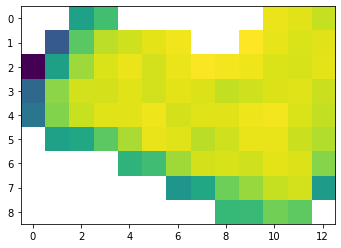

<AxesSubplot:>

In [10]:
# compute ndvi
ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))

show(ndvi)

In [11]:
np.median(ndvi)

nan

In [25]:
ndvi_ = np.nan_to_num(ndvi, nan=-1)
ndvi_values = np.array([x for x in ndvi_.flatten() if x != -1])
ndvi_values.mean(),np.median(ndvi_values),ndvi_values.var()

(0.9122723507145017, 0.9292864269939182, 0.001375915231108995)

## Moisture Index

<ipython-input-13-61bade9bacff>:2: RuntimeWarning: invalid value encountered in true_divide
  mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))


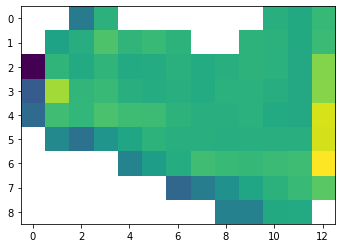

<AxesSubplot:>

In [13]:
# Moisture Index
mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))

show(mi)

In [14]:
np.median(mi)

nan

In [26]:
mi_ = np.nan_to_num(mi, nan=-1)
mi_values =np.array([x for x in mi_.flatten() if x != -1])
mi_values.mean(),np.median(mi_values),mi_values.var()

(0.3851100798649795, 0.3887433626229697, 0.002091112622627198)

## Band Combinations

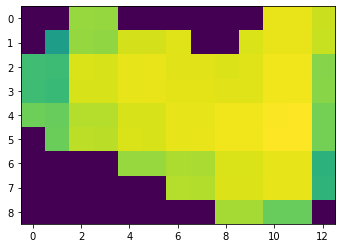

<AxesSubplot:>

In [16]:
# Band Combo 1 Veg Density and Health - B4 Soil Type and Chlorophyll Absorption, B6 Plant Health and Age, 
# and B7 Biomass Content (band_combo_1 needs to be normalized later)

band_combo_1 = img.read(7) + img.read(6) + img.read(4)
show(band_combo_1)

In [22]:
bc1_ = np.nan_to_num(band_combo_1, nan=-1)
bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
bc1_values.mean(),np.median(bc1_values),bc1_values.var()

(4005.880341880342, 5377.0, 6027666.618160566)

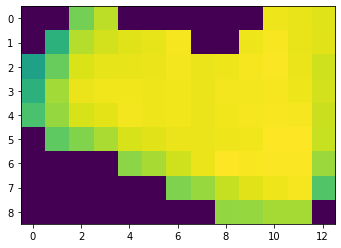

<AxesSubplot:>

In [18]:
# Band Combo 2 Agriculture - B2 Blue water, B8 NIR-2 Biomass Content, B11 SWIR Moisture Content 
# and B7 Biomass Content) (band_combo_2 needs to be normalized later)

band_combo_2 = img.read(11) + img.read(8) + img.read(2)
show(band_combo_2)

In [21]:
bc2_ = np.nan_to_num(band_combo_2, nan=-1)
bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
bc2_values.mean(),np.median(bc2_values), bc2_values.var()

(3204.7948717948716, 4383.0, 3831845.4621959236)